# Prepare the setup

In [26]:
# Import packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [27]:
# Load the dataset
df = pd.read_csv("../data/new_training_dataset.csv")

In [28]:
# Drop TLD column because its object type
df = df.drop(columns=['TLD'])


This dataset was already in csv format, so we imported it directly. To prepare it we removed some columns we didn't need for the model development. Most of those were categorical type which we didn't need or were already covered with other similar columns. 


# Initial Exploration

In [29]:
# See the first 5 rows
df.head()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.0,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.0,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.0,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.0,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.0,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1


In [30]:
# Print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

As we can see, all of our features are now int or float.

In [31]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


We can see basic statistical information such as count, mean, standard deviation, minimum value, the quartiles, and maximum value.

In [32]:
# Check for null values
df.isna().sum()

URLLength                     0
DomainLength                  0
IsDomainIP                    0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive                  0
NoOfURLRedirect               0
NoOfSelf

As with the other dataset, we luckily have no NAs.

In [33]:
# Check for duplicates
df.duplicated().sum()

np.int64(808)

We don't have a lot of duplicates, they only account for around 0.4% of our dataset, so we're going to drop them.

In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

np.int64(0)

The values were dropped successfully.
## Check for class imbalance

In [36]:
# Check target class
df['label'].value_counts()

label
1    134850
0    100137
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

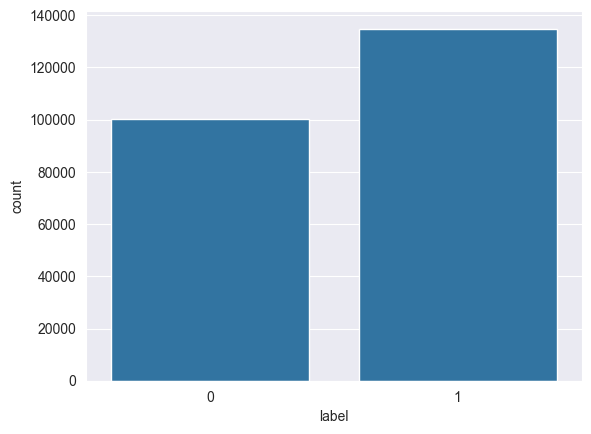

In [37]:
# Class distribution plot
sns.countplot(x='label', data=df)

There is not a big difference between the two results, so we go to the next step without balancing.
## More visualisations
## Scaling and splitting

In [38]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# Scale the features
scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training: LogisticRegression


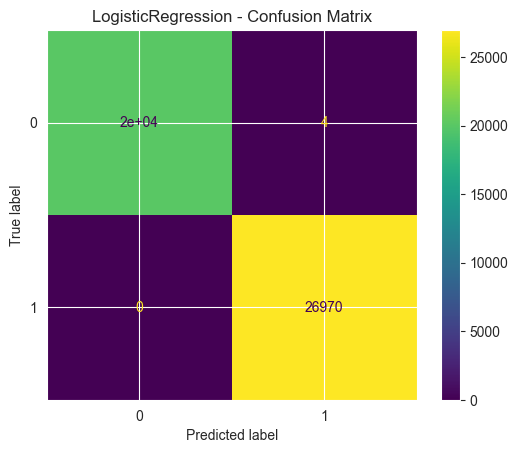


Training: KNeighborsClassifier


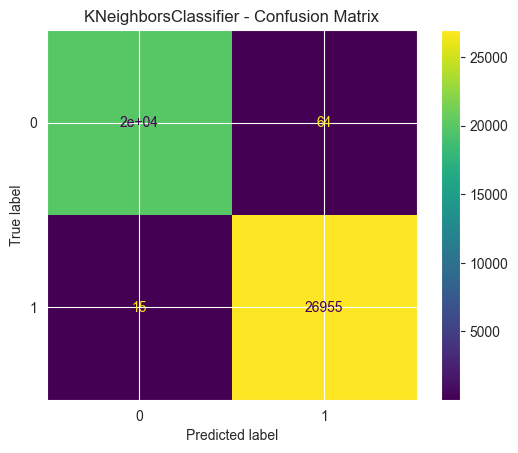


Training: DecisionTreeClassifier


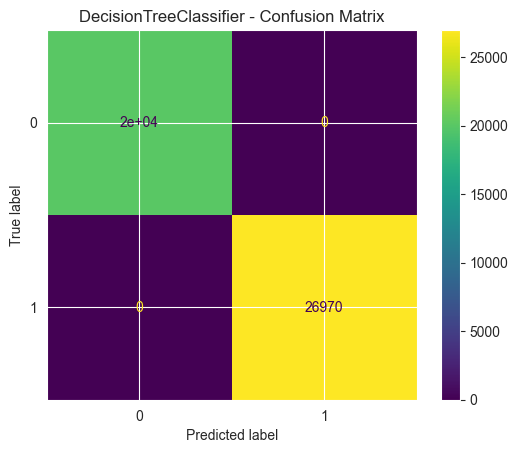

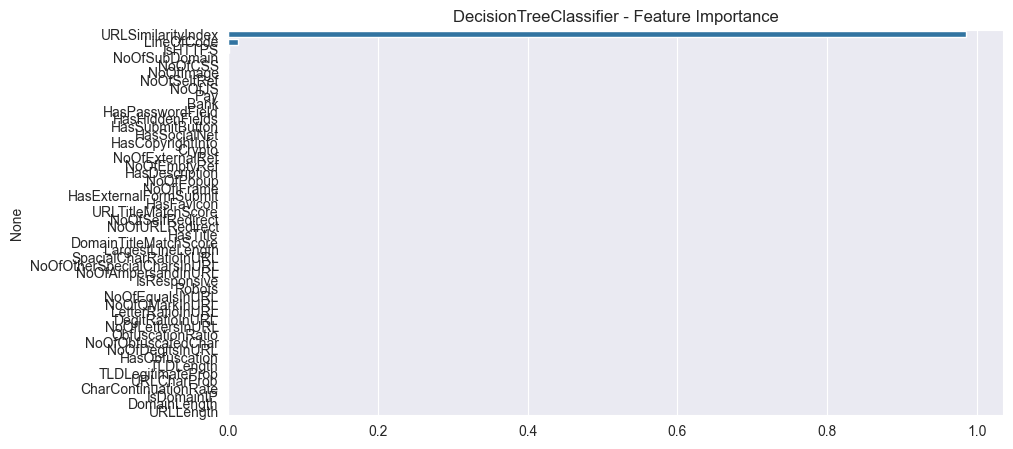


Training: RandomForestClassifier


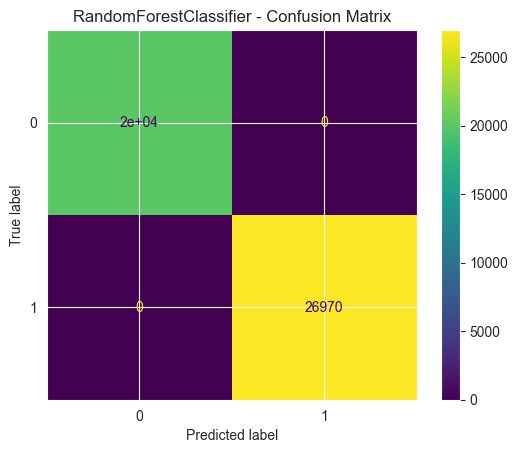

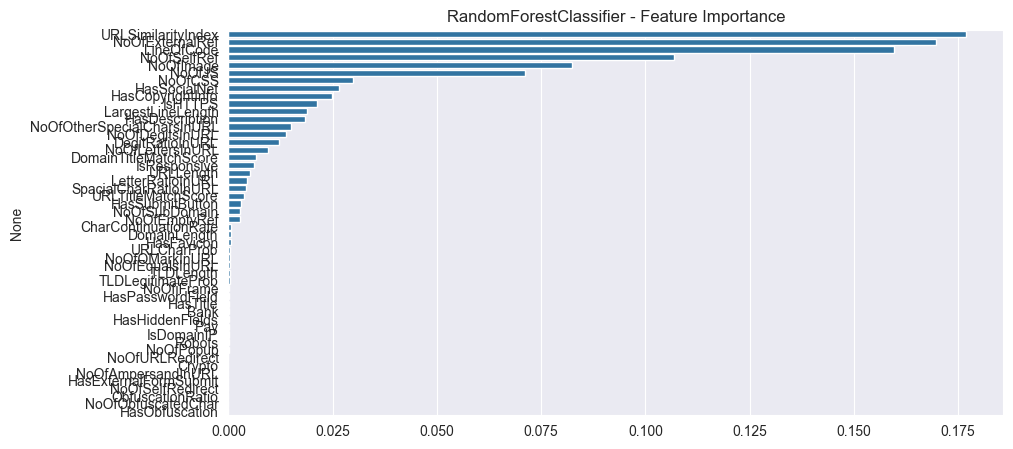

                    Model  Accuracy  Precision    Recall  F1 Score
0      LogisticRegression  0.999915   0.999852  1.000000  0.999926
1    KNeighborsClassifier  0.998319   0.997631  0.999444  0.998537
2  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000
3  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000


In [40]:
np.random.seed(42)

# Models to train
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Scaled or not
use_scaled = {
    "LogisticRegression": True,
    "KNeighborsClassifier": True,
    "DecisionTreeClassifier": False,
    "RandomForestClassifier": False
}

results = []

# Train and evaluate
for name, model in models.items():
    print(f"\nTraining: {name}")

    if use_scaled[name]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_input = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_input = X_test

    # Metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, zero_division=0)
    })

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_input, y_test)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Feature Importance if exists
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        feature_names = X.columns if not use_scaled[name] else X.columns  # same columns
        plt.figure(figsize=(10, 5))
        sns.barplot(x=importances[indices], y=feature_names[indices])
        plt.title(f"{name} - Feature Importance")
        plt.show()

# Show results
results_df = pd.DataFrame(results)
print(results_df)